# Database exploration with robotoff API

In [4]:
%load_ext autoreload
%autoreload 2

In [18]:
from robotoff.products import ProductDataset

#streaming data
ds = ProductDataset.load()

product_iter = (ds.stream()
                  #.filter_by_country_tag('en:france')
                  #.filter_nonempty_text_field('ingredients_text_fr')
                  .filter_by_state_tag('en:complete')
                  .iter())

count = 0
for product in product_iter:
    print(product['product_name'])
    count += 1
    if count == 10:
        break

hemp seeds
British Self Raising Flour
Asparagus Spears
Coconut juice
Raspberry jaffa cakes
Crème de marrons de l'Ardèche
Crème de marrons de l'Ardèche
Crème de Marrons de l'Ardèche
Coffee cakes
Cranberry Classic


In [19]:
prod = next(product_iter)
prod

{'_id': '0034500151924',
 'ingredients': [{'percent_max': 100.0,
   'percent_min': 50.0,
   'id': 'en:Sweet cream',
   'percent_estimate': 75.0,
   'text': 'Sweet cream'},
  {'vegetarian': 'maybe',
   'id': 'en:natural-flavouring',
   'percent_estimate': 25,
   'text': 'natural flavoring',
   'percent_max': 50.0,
   'vegan': 'maybe',
   'percent_min': 0.0}],
 'packaging_old': 'Butter sticks wrapped in paper in a light cardboard box',
 'update_key': 'ingredients20220627',
 'categories_properties_tags': ['all-products',
  'categories-known',
  'agribalyse-food-code-unknown',
  'agribalyse-proxy-food-code-16400',
  'agribalyse-proxy-food-code-known',
  'ciqual-food-code-16414',
  'ciqual-food-code-known',
  'agribalyse-known',
  'agribalyse-16400'],
 'other_nutritional_substances_tags': [],
 'interface_version_modified': '20150316.jqm2',
 'food_groups': 'en:fats',
 'ingredients_original_tags': ['en:Sweet cream', 'en:natural-flavouring'],
 'origins_tags': ['en:united-states'],
 'nutriments

## Collecting images from mongoDB

-> https://wiki.openfoodfacts.org/Developer-How_To
We need to convert each barcode (_id) to something of this form: https://images.openfoodfacts.org/images/products/073/762/806/4502/

In [20]:
from EDA import get_images
get_images(prod)

In [38]:
barcode = prod["_id"]

base = "https://images.openfoodfacts.org/images/products/"

def to_pattern(s):
    pat = []
    group_enumerator = list(range(0, len(s), 3))
    for index, i in enumerate(group_enumerator):
        if index == len(group_enumerator)-1: #rest
            if len(s[i:]) > 0:
                pat[-1] = pat[-1] + s[i:]
                continue
        pat.append(s[i:i+3])
    #[s[i:i+3] for i in range(0, len(s), 3)]
    return "/".join(pat)

to_url = lambda id: base+to_pattern(id)
barcode, to_pattern(barcode), to_url(barcode)
#https://images.openfoodfacts.org/images/products/
#https://world.openfoodfacts.org/images/products/003/450/015/1924/front_en.5.400.jpg

('0034500151924',
 '003/450/015/1924',
 'https://images.openfoodfacts.org/images/products/003/450/015/1924')

In [ ]:
# translate images map to 

## Collecting some sample question-answers

## Alternative: CSV exploration
Already contains the URLs to the images for which to make PDF files

In [41]:
import os
import pandas as pd 

In [48]:
path = os.path.expanduser("~/code/DUchallenge/data/OFF/robotoff/datasets/en.openfoodfacts.org.products.csv") #english
df = pd.read_csv(path, sep="\t") 
# 937 415 produits for French version [is it a subset?]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,Andrè,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,Skyr,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# 2.5M records ~2,538,819 products
#dict(df.iloc[1])
#len(df)
#df.head()
df.head()

2508100

In [58]:
import json
import numpy as np 
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
print(json.dumps(dict(df.iloc[1]), indent=4, cls=NumpyEncoder))

{
    "code": "0000000000000207025004",
    "url": "http://world-en.openfoodfacts.org/product/0000000000000207025004/andre",
    "creator": "kiliweb",
    "created_t": 1656948610,
    "created_datetime": "2022-07-04T15:30:10Z",
    "last_modified_t": 1656948613,
    "last_modified_datetime": "2022-07-04T15:30:13Z",
    "product_name": "Andr\u00e8",
    "abbreviated_product_name": NaN,
    "generic_name": NaN,
    "quantity": NaN,
    "packaging": NaN,
    "packaging_tags": NaN,
    "packaging_en": NaN,
    "packaging_text": NaN,
    "brands": NaN,
    "brands_tags": NaN,
    "categories": NaN,
    "categories_tags": NaN,
    "categories_en": NaN,
    "origins": NaN,
    "origins_tags": NaN,
    "origins_en": NaN,
    "manufacturing_places": NaN,
    "manufacturing_places_tags": NaN,
    "labels": NaN,
    "labels_tags": NaN,
    "labels_en": NaN,
    "emb_codes": NaN,
    "emb_codes_tags": NaN,
    "first_packaging_code_geo": NaN,
    "cities": NaN,
    "cities_tags": NaN,
    "purchas

In [70]:
#print(df.columns.tolist())
most_important = ["product_name"]
original_columns = ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'packaging_en', 'packaging_text', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'ingredients_tags', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'food_groups', 'food_groups_tags', 'food_groups_en', 'states', 'states_tags', 'states_en', 'brand_owner', 'ecoscore_score', 'ecoscore_grade', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g', '-lactose_100g', '-maltose_100g', '-maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'soluble-fiber_100g', 'insoluble-fiber_100g', 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g']
image_columns = [x for x in original_columns if "image" in x]
image_columns

['image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url']

## Statistics on the dataset [before cleaning]

1. kick out variables that are not filled in 25% of cases

['code', 'states_tags', 'url', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'states', 'states_en', 'creator', 'pnns_groups_2', 'pnns_groups_1', 'ecoscore_grade', 'countries', 'countries_en', 'countries_tags', 'product_name', 'image_small_url', 'image_url', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'energy-kcal_100g', 'saturated-fat_100g', 'salt_100g', 'sodium_100g', 'image_nutrition_small_url', 'image_nutrition_url', 'brands', 'brands_tags', 'categories', 'main_category_en', 'main_category', 'categories_en', 'categories_tags', 'food_groups_tags', 'food_groups_en', 'food_groups', 'nutrition-score-fr_100g', 'nutriscore_grade', 'nutriscore_score', 'fiber_100g', 'additives_n', 'ingredients_text', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'ingredients_tags', 'image_ingredients_small_url', 'image_ingredients_url', 'nova_group', 'quantity']


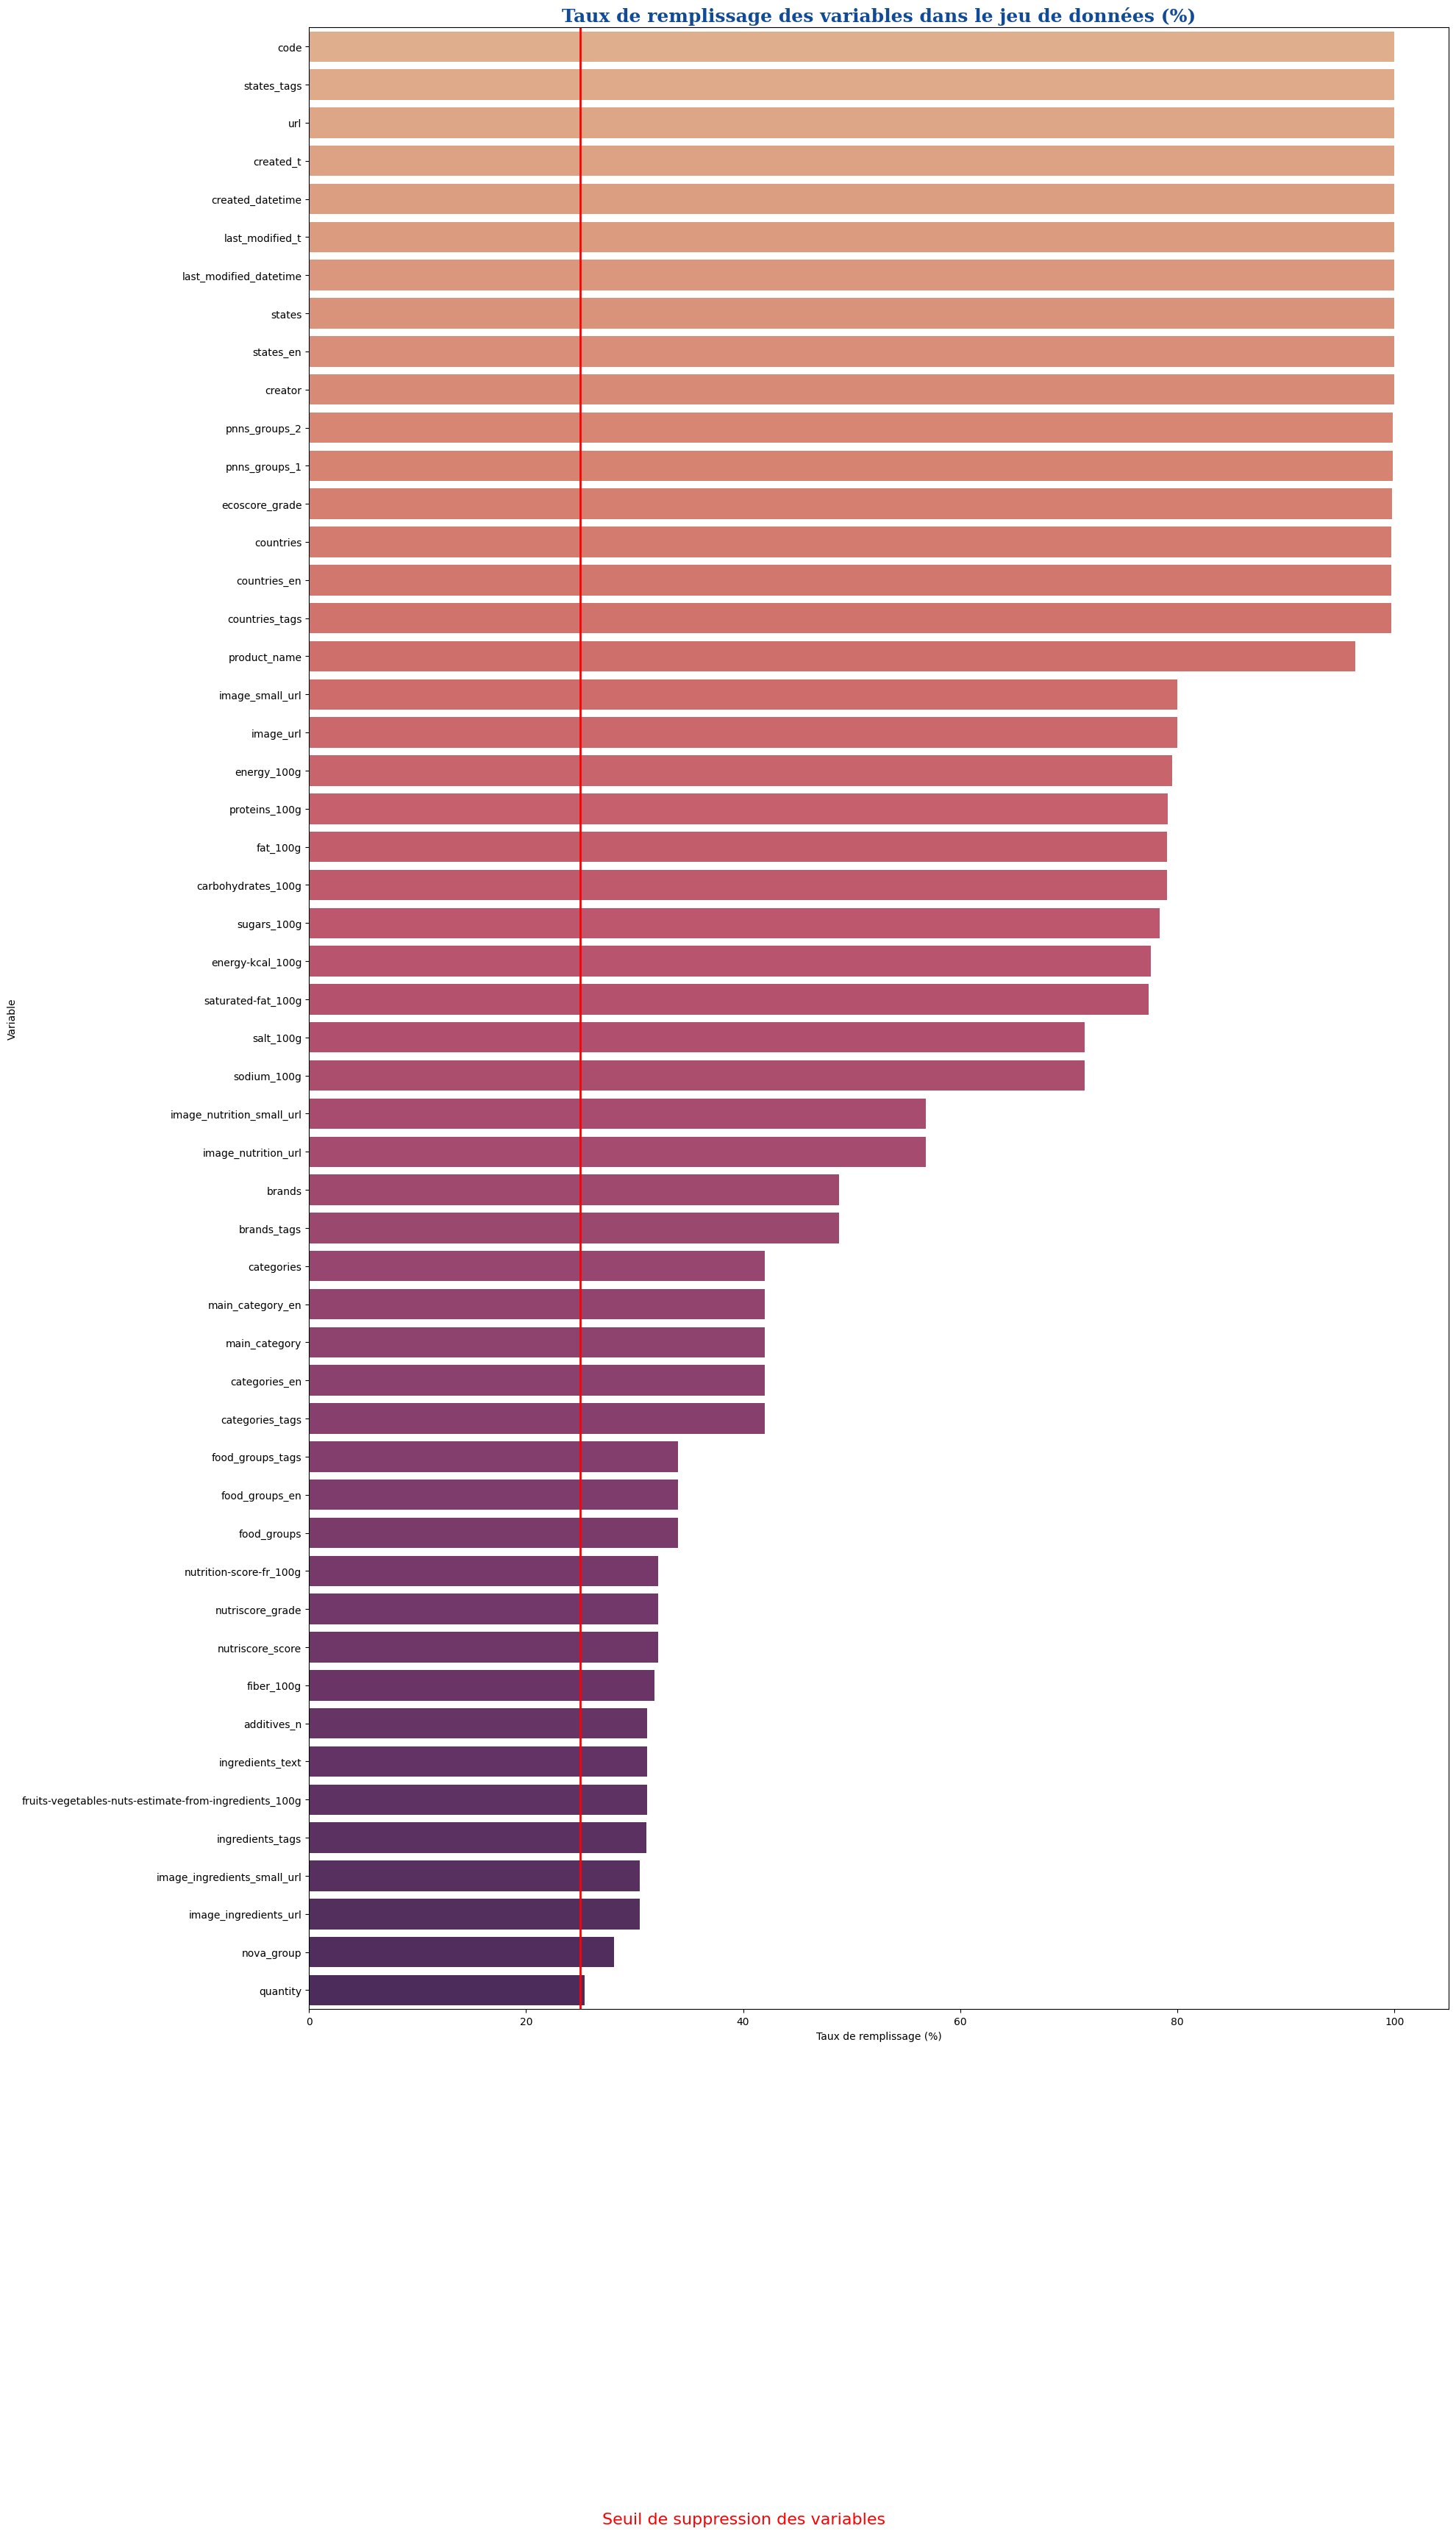

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def null_factor(df, tx_threshold=50):
    null_rate = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
    null_rate.columns = ['Variable','Taux_de_Null']
    high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
    return high_null_rate

full_null_rate = null_factor(df, 100)

filling_features = null_factor(df, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 25


#Liste des variables à conserver
features_to_conserve = list(filling_features.loc[filling_features['Taux_de_Null']>=sup_threshold, 'Variable'].values)
#Liste des variables supprimées
deleted_features = list(filling_features.loc[filling_features['Taux_de_Null']<sup_threshold, 'Variable'].values)

#Nouveau dfet avec les variables conservées
df = df[features_to_conserve].sort_values(["created_datetime","last_modified_datetime"], ascending=True)
print(features_to_conserve)

plot = True

if plot:

    fig = plt.figure(figsize=(20, 35))

    font_title = {'family': 'serif',
                  'color':  '#114b98',
                  'weight': 'bold',
                  'size': 18,
                 }


    sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
    #Seuil pour suppression des varaibles
    plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
    plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

    plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
    plt.xlabel("Taux de remplissage (%)")
    plt.show()

In [73]:
# filter for where all images are present 
sorted(features_to_conserve)
image_columns = [
 'image_ingredients_small_url',
 'image_ingredients_url',
 'image_nutrition_small_url',
 'image_nutrition_url',
 'image_small_url',
 'image_url']
#it seems front and back are missing? -> no distinction in csv

image_df = df[(~df.image_url.isnull()) & (~df.image_ingredients_url.isnull()) & (~df.image_nutrition_url.isnull())]
print(len(image_df))


#434617

#lambda get images

434617


In [76]:
image_df.to_csv("25drop-allimages-en-world.csv")
#countries_tags -> which country it was submitted

In [75]:
# check on languages
df["url"].apply(lambda x: x.split("-")[1][:2]).unique()
#http://world-en.openfoodfacts.org/product/0000...	


array(['en'], dtype=object)

In [66]:
# subset 100_g [phyicochemical substances]
def search_chem_component(df, suffix='_100g'):
    chem_component = []
    for col in df.columns:
        if '_100g' in col: chem_component.append(col)
    df_subset_columns = df[chem_component]
    return df_subset_columns

df_subset_nutrients = search_chem_component(df,'_100g')